# a)  Write a program to solve the problem using simulated annealing on a 50 × 50 lattice. The “energy” function for the system is minus the number of dimers, so that it is minimized when the dimers are a maximum. The moves for the Markov chain are as follows:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

add dimers now, create a function that 


- picks a random point on the lattice 

- pick a random direction, and select and try

- If that works, save to lattice

- If it doesn't work, try another random selection 

- Repeat until either on the grid, or don't 

From book : 


i) Choose two adjacent sites on the lattice at random.
ii) If those two sites are currently occupied by a single dimer, remove the dimer from
the lattice.
iii) If they are currently both empty, add a dimer.
iv) Otherwise, do nothing.





In [4]:
def anneal_dimers(lattice,T):
    
    #first propose a location i,j, and then i+1,j, i-1,j, i,j+1, i,j-1
    
    first_pt = random.randrange(start=1,stop = lattice.shape[0]-1) , random.randrange(start=1,stop = lattice.shape[0]-1)
    directions= ['U','D','L','R']
    direction = np.random.choice(directions)
    if direction == 'U':
        second_pt = first_pt[0] , first_pt[1] + 1
    if direction == 'D':
        second_pt = first_pt[0] , first_pt[1] - 1
    if direction == 'L':
        second_pt = first_pt[0] - 1, first_pt[1]
    if direction == 'R':
        second_pt = first_pt[0] + 1, first_pt[1]
            
    #now decide whether or not to accept or reject this change. 
    
    
    if lattice[first_pt] + lattice[second_pt] == 0:
        #accept! No one is here
        lattice[first_pt] = 1
        lattice[second_pt] = 1
    if lattice[first_pt] + lattice[second_pt] == 1:
        pass
        #do nothing
        
    if lattice[first_pt] + lattice[second_pt] == 2:
        #both occupied. Are we better off removing this dimer and trying later? 
        #We will determine whether or not to with sim anneal. 
        
        if np.random.random() < np.exp(-1/T):
            lattice[first_pt] = 0
            lattice[second_pt] = 0
        else: 
            #leave as is
            pass 
            
    return lattice

In [5]:
L = 50
s = np.zeros((L,L),int)

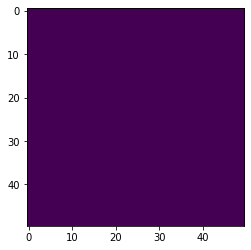

In [6]:
plt.imshow(s)

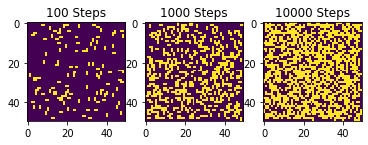

In [9]:
N = 0

L = 50
s = np.zeros((L,L),int)
while N < 100:
    
    s = anneal_dimers(s,T=1)

    N +=1
    
plt.subplot(131)
plt.title(str(N) + " Steps")
plt.imshow(s)


while N < 1000:
    
    s = anneal_dimers(s,T=1)

    N +=1
    
plt.subplot(132)
plt.title(str(N) + " Steps")
plt.imshow(s)



while N < 10000:
    
    s = anneal_dimers(s,T=1)

    N +=1
plt.subplot(133)
plt.title(str(N) + " Steps")
plt.imshow(s)

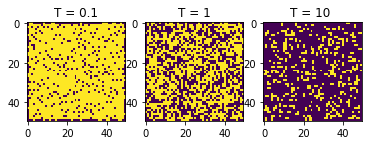

In [11]:
N = 0

L = 50
s = np.zeros((L,L),int)
while N < 10000:
    
    s = anneal_dimers(s,T=.1)

    N +=1
    
plt.subplot(131)
plt.title("T = 0.1")
plt.imshow(s)


N = 0
L = 50
s = np.zeros((L,L),int)
while N < 10000:
    
    s = anneal_dimers(s,T=1)

    N +=1
    
plt.subplot(132)
plt.title("T = 1")
plt.imshow(s)

N = 0
L = 50
s = np.zeros((L,L),int)
while N < 10000:
    
    s = anneal_dimers(s,T=10)

    N +=1
plt.subplot(133)
plt.title("T = 10 ")
plt.imshow(s)

In [ ]:
np.random.random()